In [227]:
!pip install scikit-fuzzy

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz #載入 scikit-fuzzy套件

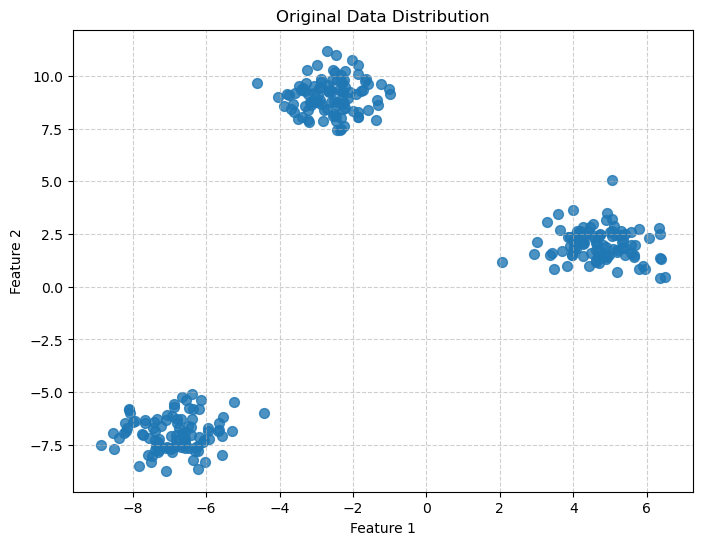

In [229]:
#1.資料生成
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)
# print(X.shape)
#轉置 (Transpose)
data = X.T #Fuzzy C-means (skfuzz) 需要資料的形狀是 (n_features, n_samples)
#print(data.shape) #(2, 300)

#視覺化原始資料 觀察其分布
plt.figure(figsize=(8,6))
#繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
plt.scatter(X[:,0], X[:,1], s=50, alpha=0.8) 
plt.title("Original Data Distribution")#設定圖表標題
plt.xlabel("Feature 1") #設定X軸標籤
plt.ylabel("Feature 2") #設定Y軸標籤
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.show() #顯示圖表

Fuzzy C-means 質心座標:
[[-2.60926028  9.03638098]
 [ 4.72965653  1.99838993]
 [-6.88623916 -6.96844804]]
[[0.00161104 0.00177482 0.97467487 0.00893211 0.00981194]
 [0.00203741 0.00216799 0.01920844 0.98756741 0.01146691]
 [0.99635155 0.99605719 0.00611669 0.00350049 0.97872115]]


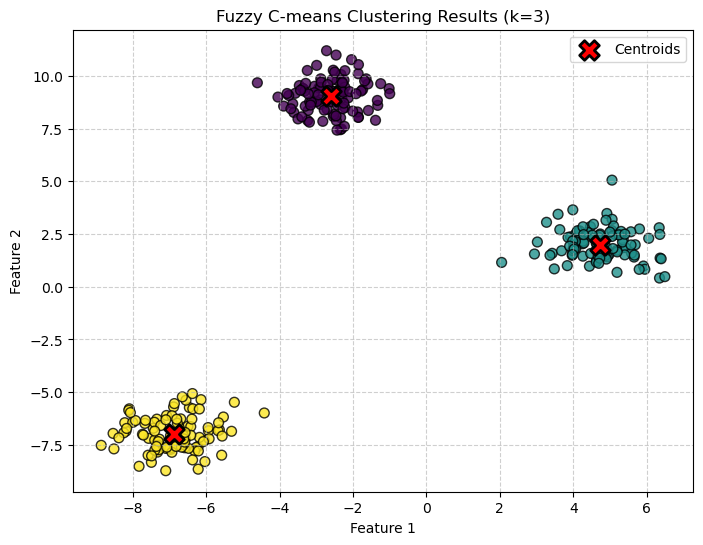

In [230]:
#2.執行 Fuzzy C-means分群
K = 3 #分群數量
m = 2 #模糊係數 m=1(k-means)
error = 0.005 #收斂闊值
max_iter = 1000 #最大執行次數(迭代)
#cntr 最終的群集中心
#u 隸屬度矩陣(membership matrix),u[i, j] 表示資料點 j 屬於群集 i 的隸屬度
#u0 初始隸屬度矩陣(如果為None則隨機初始化)
#d 距離矩陣(distance matrix)
#jm 目標函數值 (objective function history)
#p 迭代次數(number of iteration)
#fpc 模糊分群係數(Fuzzy Partition Coefficient)
cntr, u, u0, d,jm, p, fpc=fuzz.cmeans(data, K, m, error, max_iter, init=None, seed=42)
#np.argmax(u, axis=0) 會返回每個資料點在所有群集中隸屬度最高的那個群集的索引
cluster_membership = np.argmax(u, axis=0)
print("Fuzzy C-means 質心座標:")
print(cntr)
print(u[: , 0:5])


#視覺化原始資料 觀察其分布
plt.figure(figsize=(8,6))
#繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
plt.scatter(X[:,0], X[:,1], c = cluster_membership, s=50, cmap='viridis', alpha=0.8, edgecolors='k') 
plt.scatter(cntr[:,0], cntr[:,1], marker='X', s=200, c='red', edgecolors='k', linewidths=2, label='Centroids')
plt.title("Fuzzy C-means Clustering Results (k=3)")#設定圖表標題
plt.xlabel("Feature 1") #設定X軸標籤
plt.ylabel("Feature 2") #設定Y軸標籤
plt.legend() #顯示圖例
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.show() #顯示圖表

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_68464\2636061228.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #顯示圖例


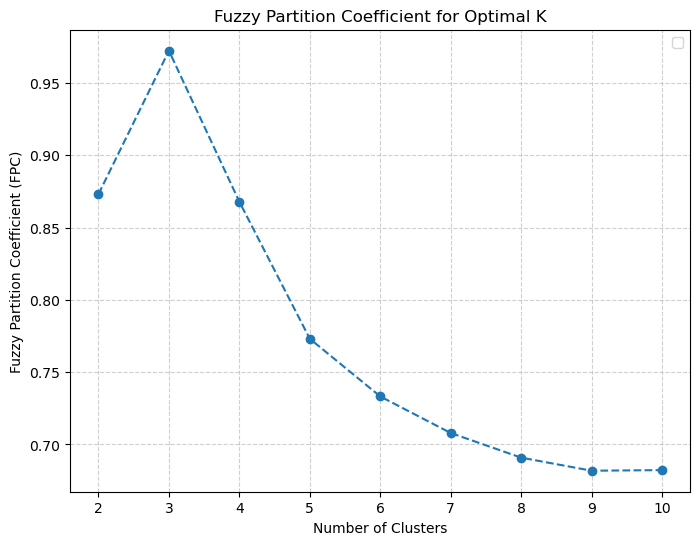

In [231]:
# 評估最佳 K值 - Fuzzy Partition Coefficient (FPC)
fpcs = []
for ncenters in range(2,11):
    cntr_fcm, u_fcm, u0_fcm, d_fcm,jm_fcm, p_fcm, fpc_fcm=fuzz.cmeans(data, ncenters, m, error, max_iter, init=None, seed=42)
    fpcs.append(fpc_fcm)

#視覺化原始資料 觀察其分布
plt.figure(figsize=(8,6))
plt.plot(range(2,11) , fpcs, marker='o', linestyle="--")

plt.title("Fuzzy Partition Coefficient for Optimal K")#設定圖表標題
plt.xlabel("Number of Clusters") #設定X軸標籤
plt.ylabel("Fuzzy Partition Coefficient (FPC)") #設定Y軸標籤
plt.legend() #顯示圖例
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.xticks(range(2,11))
plt.show() #顯示圖表

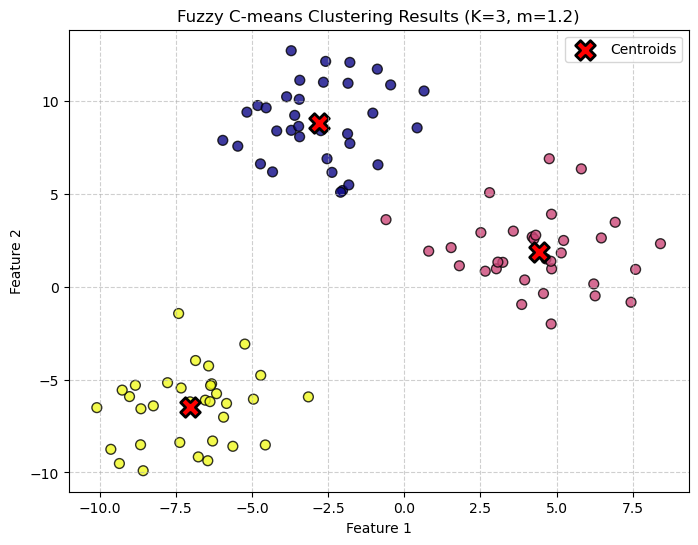

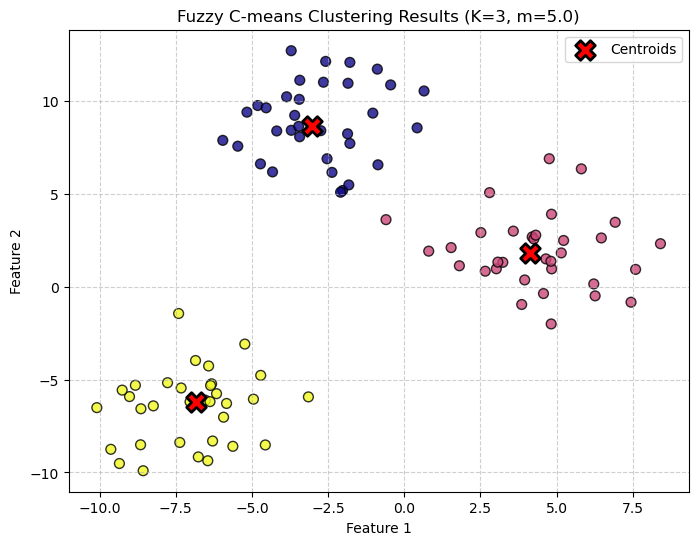

FPC for m = 1.2: 0.995
FPC for m = 5.0: 0.420
[ 6 24  5]


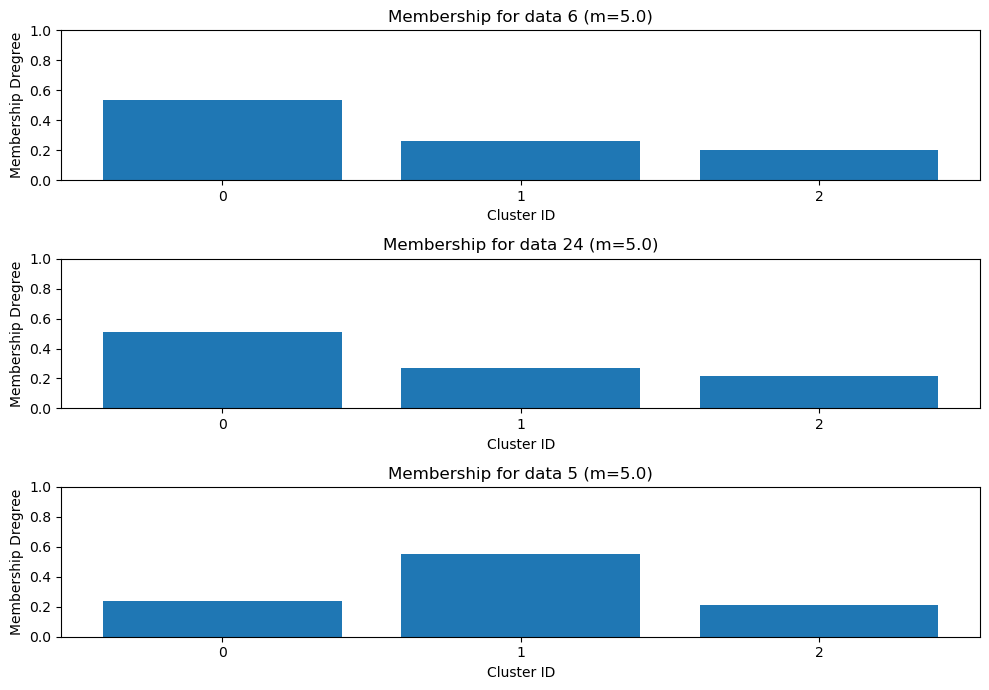

In [232]:
from sklearn.datasets import make_blobs
#練習題
#1.資料生成
X_ex, y_true_ex = make_blobs(n_samples=100, centers=3, cluster_std=2, random_state=42)
#轉置
data_ex = X_ex.T


# #視覺化原始資料 觀察其分布
# plt.figure(figsize=(8,6))
# #繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
# plt.scatter(X_ex[:,0], X_ex[:,1], s=50, alpha=0.6) 
# plt.title("Original Data Distribution")#設定圖表標題
# plt.xlabel("Feature 1") #設定X軸標籤
# plt.ylabel("Feature 2") #設定Y軸標籤
# plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
# plt.show() #顯示圖表

#2.執行 Fuzzy C-means分群
K_ex = 3 #分群數量
m_ex = 2 #模糊係數 m=1(k-means)
error_ex = 0.005 #收斂闊值
max_iter_ex = 1000 #最大執行次數(迭代)


#情境1 m=1.2 (較不模糊)
m_less_fuzzy = 1.2

cntr_less_fuzzy, u_less_fuzzy, _, _,_, _, fpc_less_fuzzy=fuzz.cmeans(data_ex, K_ex, m_less_fuzzy, error_ex, max_iter_ex, init=None, seed=42)
cluster_membership_less_fuzzy = np.argmax(u_less_fuzzy, axis=0)

#視覺化原始資料 觀察其分布
plt.figure(figsize=(8,6))
#繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
plt.scatter(X_ex[:,0], X_ex[:,1], c = cluster_membership_less_fuzzy, s=50, cmap='plasma', alpha=0.8, edgecolors='k') 
plt.scatter(cntr_less_fuzzy[:,0], cntr_less_fuzzy[:,1], marker='X', s=200, c='red', edgecolors='k', linewidths=2, label='Centroids')
plt.title(f"Fuzzy C-means Clustering Results (K={K_ex}, m={m_less_fuzzy})")#設定圖表標題
plt.xlabel("Feature 1") #設定X軸標籤
plt.ylabel("Feature 2") #設定Y軸標籤
plt.legend() #顯示圖例
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.show() #顯示圖表




#情境2 m=1.2 (較不模糊)
m_more_fuzzy = 5.0

cntr_more_fuzzy, u_more_fuzzy, _, _,_, _, fpc_more_fuzzy=fuzz.cmeans(data_ex, K_ex, m_more_fuzzy, error_ex, max_iter_ex, init=None, seed=42)
cluster_membership_more_fuzzy = np.argmax(u_more_fuzzy, axis=0)

#視覺化原始資料 觀察其分布
plt.figure(figsize=(8,6))
#繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
plt.scatter(X_ex[:,0], X_ex[:,1], c = cluster_membership_more_fuzzy, s=50, cmap='plasma', alpha=0.8, edgecolors='k') 
plt.scatter(cntr_more_fuzzy[:,0], cntr_more_fuzzy[:,1], marker='X', s=200, c='red', edgecolors='k', linewidths=2, label='Centroids')
plt.title(f"Fuzzy C-means Clustering Results (K={K_ex}, m={m_more_fuzzy})")#設定圖表標題
plt.xlabel("Feature 1") #設定X軸標籤
plt.ylabel("Feature 2") #設定Y軸標籤
plt.legend() #顯示圖例
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.show() #顯示圖表

print(f"FPC for m = {m_less_fuzzy}: {fpc_less_fuzzy:.3f}")
print(f"FPC for m = {m_more_fuzzy}: {fpc_more_fuzzy:.3f}")



#視覺化 隨機選3筆
random_indics = np.random.choice(X_ex.shape[0], 3, replace=False)
print(random_indics)
plt.figure(figsize=(10,7))

for i , idx in enumerate(random_indics):
    plt.subplot(3,1,i+1)
    plt.bar(range(K_ex), u_more_fuzzy[:,idx])
    plt.title(f"Membership for data {idx} (m={m_more_fuzzy})")
    plt.xlabel("Cluster ID")
    plt.ylabel("Membership Dregree")
    plt.ylim(0,1)
    plt.xticks(range(K_ex))
plt.tight_layout()
plt.show()

In [233]:
!pip install MiniSom

In [234]:
def plot_scatter(a,b):
    #視覺化原始資料 觀察其分布
    plt.figure(figsize=(9,7))
    #繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
    plt.scatter(a, b, s=50, alpha=0.8) 
    plt.title("Original Data Distribution")#設定圖表標題
    plt.xlabel("Feature 1") #設定X軸標籤
    plt.ylabel("Feature 2") #設定Y軸標籤
    plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
    plt.show() #顯示圖表

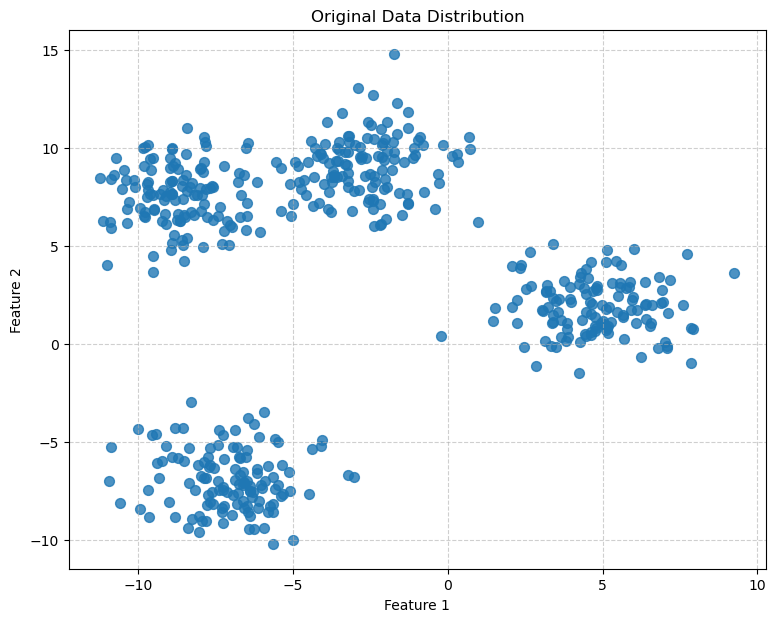

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5059093819977692


In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from minisom import MiniSom #導入MiniSom函式庫
from matplotlib.lines import Line2D

#SOM
#1.資料生成
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)
# print(X.shape)
#轉置 (Transpose)
data = X.T #Fuzzy C-means (skfuzz) 需要資料的形狀是 (n_features, n_samples)
#print(data.shape) #(2, 300)

plot_scatter(X[:,0], X[:,1])
#創建一個10*10的網格，共100個神經元
som_grid_rows=10
som_grid_cols=10

input_features = X.shape[1]
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=input_features, sigma=1.0, learning_rate=0.5, random_seed=42)

#初始化SOM權重
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000, verbose = True )
weights = som.get_weights()



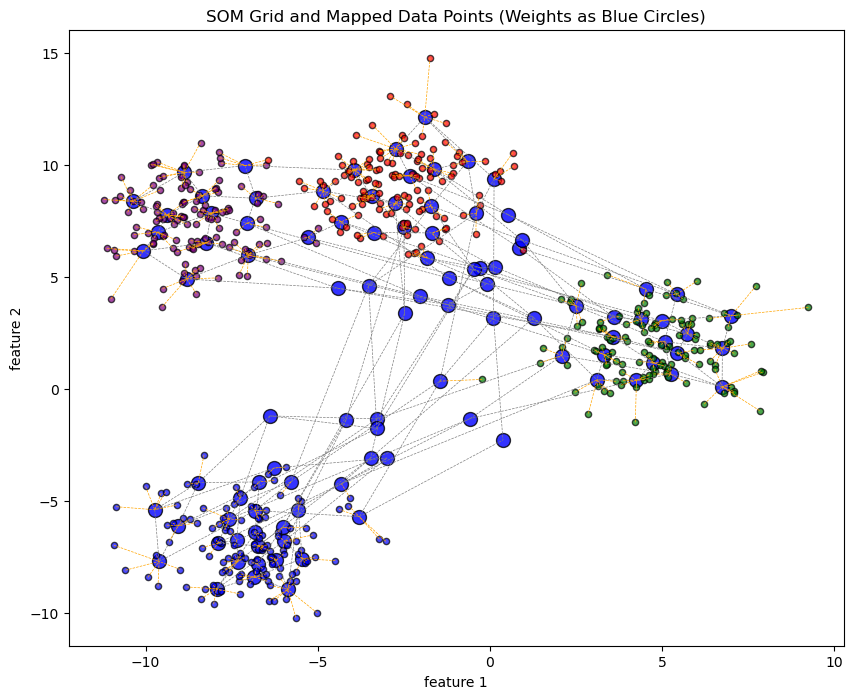

5.41889860758986 4.272278053444598
5.431879628649603
4.23885353037876


In [236]:
#3.視覺化 SOM 訓練結果
# 繪製SOM 網格和每個神經元的權重
plt.figure(figsize=(10,8))
for i , row in enumerate(som.get_weights()):
    for j , col in enumerate(row):
        #繪製神經源權重點
        plt.scatter(col[0], col[1], s=100, marker='o', color='blue', edgecolors='black', alpha=0.8)

        #繪製連接線，連接相連神經元，顯示網格結構
        if i < som_grid_rows-1:#連接垂直方向的鄰居
            plt.plot([col[0], som.get_weights()[i+1, j, 0]], [col[1], som.get_weights()[i+1, j, 1]], color="grey", linestyle="--", linewidth = 0.5)
        if j < som_grid_cols-1:#連接水平方向的鄰居
            plt.plot([col[0], som.get_weights()[i, j+1, 0]], [col[1], som.get_weights()[i, j+1, 1]], color="grey", linestyle="--", linewidth = 0.5)




#將每個資料點映射到其 BMU 上，並繪製原始資料點
# colors 用於根據原始真實群集標籤上色，方便比較
colors = ['red', 'green', 'blue', 'purple'] #假設有4個真實群集
for i , data_point in enumerate(X):
    winning_node = som.winner(data_point) #BMU(x,y)
    plt.scatter(data_point[0], data_point[1],s=20, c = colors[y_true[i]], alpha=0.7, edgecolors='k')


    
    plt.plot(
        [data_point[0], som.get_weights()[winning_node[0], winning_node[1], 0]],
        [data_point[1], som.get_weights()[winning_node[0], winning_node[1], 1]],
        color='orange', linestyle="--", linewidth=0.5)
plt.title("SOM Grid and Mapped Data Points (Weights as Blue Circles)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print(data_point[0], data_point[1])
print(som.get_weights()[winning_node[0], winning_node[1], 0])
print(som.get_weights()[winning_node[0], winning_node[1], 1])

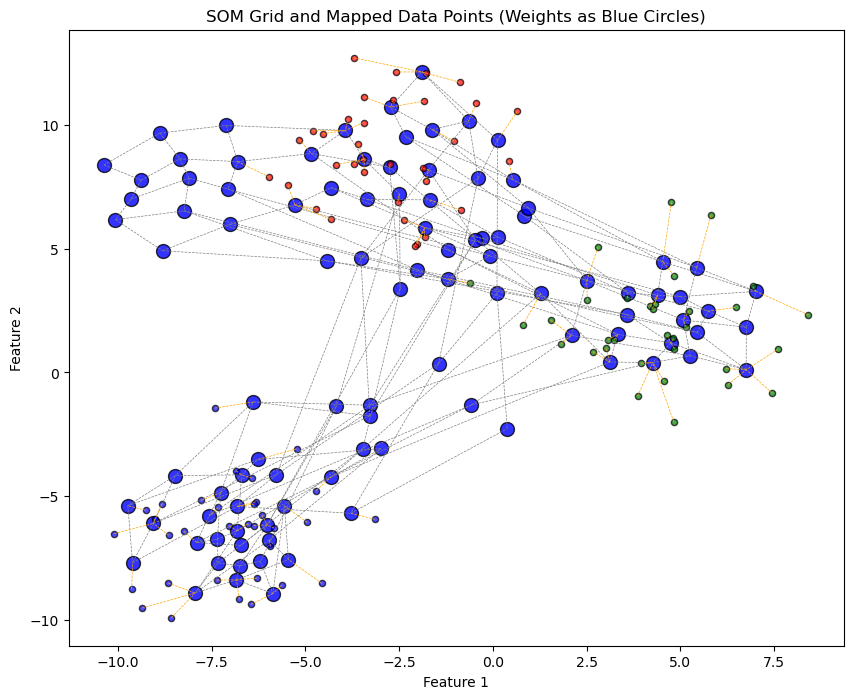

In [237]:
# 3. 視覺化 SOM 訓練結果
plt.figure(figsize=(10, 8))

# 畫 SOM 網格
weights = som.get_weights()
for i, row in enumerate(weights):
    for j, col in enumerate(row):

        # 繪製 neuron 權重
        plt.scatter(col[0], col[1], s=100, marker='o', color='blue', edgecolors='black', alpha=0.8)

        # 垂直方向鄰居
        if i < som_grid_rows - 1:
            plt.plot([col[0], weights[i+1, j, 0]],
                     [col[1], weights[i+1, j, 1]],
                     color="grey", linestyle="--", linewidth=0.5)

        # 水平方向鄰居
        if j < som_grid_cols - 1:
            plt.plot([col[0], weights[i, j+1, 0]],
                     [col[1], weights[i, j+1, 1]],
                     color="grey", linestyle="--", linewidth=0.5)

# 映射資料點到 BMU
colors = ['red', 'green', 'blue']
for i, data_point in enumerate(X_ex):  # ← 修正
    winner = som.winner(data_point)

    # 畫資料點
    plt.scatter(data_point[0], data_point[1],
                s=20, c=colors[y_true_ex[i]], alpha=0.7, edgecolors='k')

    # 畫資料點到 BMU 的連線
    plt.plot([data_point[0], weights[winner[0], winner[1], 0]],
             [data_point[1], weights[winner[0], winner[1], 1]],
             color='orange', linestyle="--", linewidth=0.5)

plt.title("SOM Grid and Mapped Data Points (Weights as Blue Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


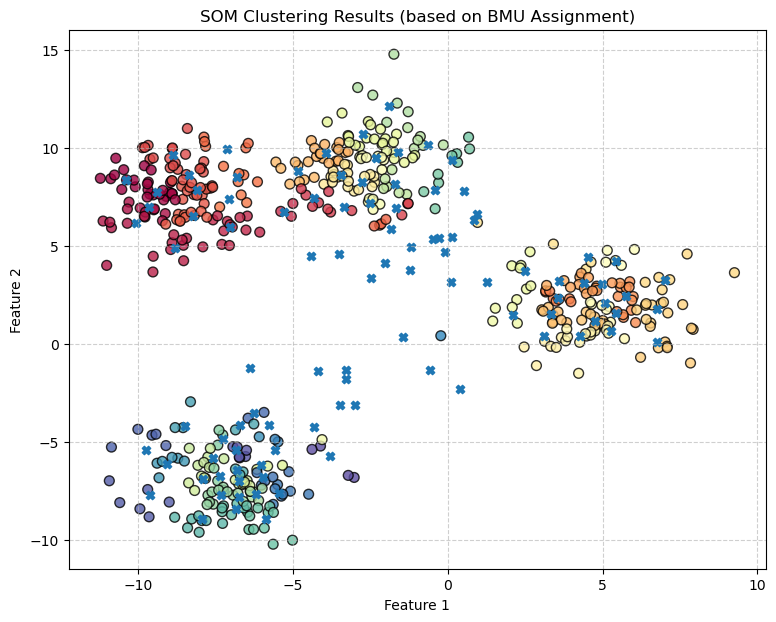

In [238]:
# 4. 執行實際分群(利用 BMU 進行分群)
# 創建一個空的字典，用於儲存每個SOM 網格神經元所對應的資料點索引
cluster_map = {}
for m in range(som_grid_rows):
    for n in range(som_grid_cols):
        cluster_map[(m,n)] = [] # 以(row,col)作為 key, value 是一個空列表
#分配BMU
for i, data_point in enumerate(X):
    winning_node = som.winner(data_point)#BMU座標
    cluster_map[winning_node].append(i)#資料索引丟入BMU列表

som_cluster_labels = np.zeros(X.shape[0], dtype=int)
cluster_id_counter = 0
for i in range(som_grid_rows):
    for j in range(som_grid_cols):
        #判斷
        if len(cluster_map[(i,j)]) > 0:
            # 將映射到這個神經元的所有資料點賦予相同的群集 ID
            for data_idx in cluster_map[(i,j)]:
                som_cluster_labels[data_idx] = cluster_id_counter
            cluster_id_counter += 1  #為下一個有資料點的BMU分配新的ID

#視覺化


plt.figure(figsize=(9,7))
#繪製散佈圖，X[:,0] 是第一個特徵，X[:1]是第二個特徵
plt.scatter(X[:,0], X[:,1], c=som_cluster_labels, s=50, cmap='Spectral' ,alpha=0.8 , edgecolors='k') 
reshaped_weights = weights.reshape(-1, input_features)
plt.scatter(reshaped_weights[:,0],reshaped_weights[:,1], marker='X', label = 'SOM node weights')



plt.title("SOM Clustering Results (based on BMU Assignment)")#設定圖表標題
plt.xlabel("Feature 1") #設定X軸標籤
plt.ylabel("Feature 2") #設定Y軸標籤
plt.grid(True, linestyle="--", alpha=0.6)#顯示網格
plt.show() #顯示圖表

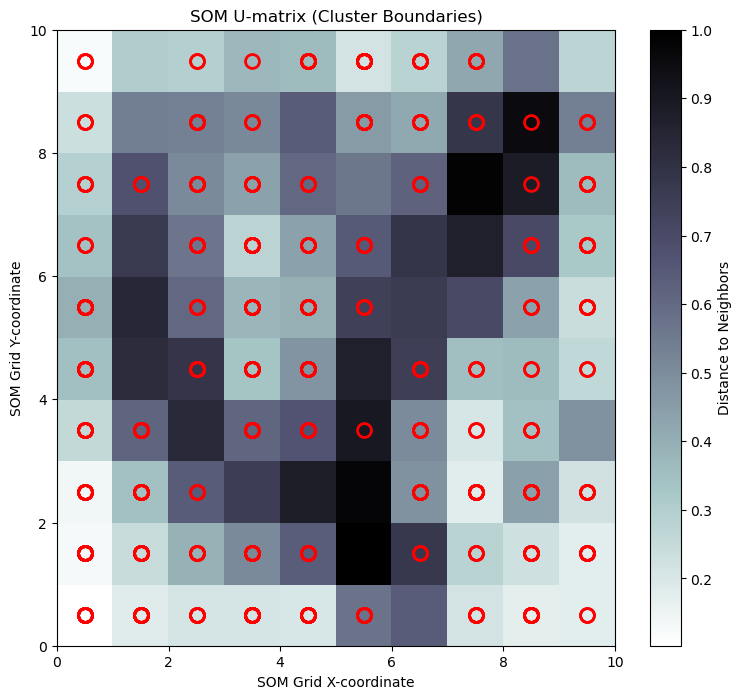

In [239]:
# 5. 使用U-matrix 視覺化群集邊界
u_matrix = som.distance_map()
plt.figure(figsize=(9,8))
# 使用 imshow 繪製 U-matrix
# cmap='bone_r' (反轉骨骼色圖) 可以讓高距離 (邊界) 顯示為較亮的顏色
plt.pcolor(u_matrix.T , cmap='bone_r') #轉置
plt.colorbar().set_label("Distance to Neighbors")
plt.title('SOM U-matrix (Cluster Boundaries)')
plt.xlabel('SOM Grid X-coordinate')
plt.ylabel('SOM Grid Y-coordinate')

#在U-matrix 上疊加原始資料點的BMU位置
for i, data_point in enumerate(X):
    winning_node = som.winner(data_point)
    # 在 U-matrix 上繪製資料點的 BMU 位置
    plt.plot(winning_node[0] + 0.5, winning_node[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='red', markersize=10, markeredgewidth=2)



plt.show() #顯示圖表

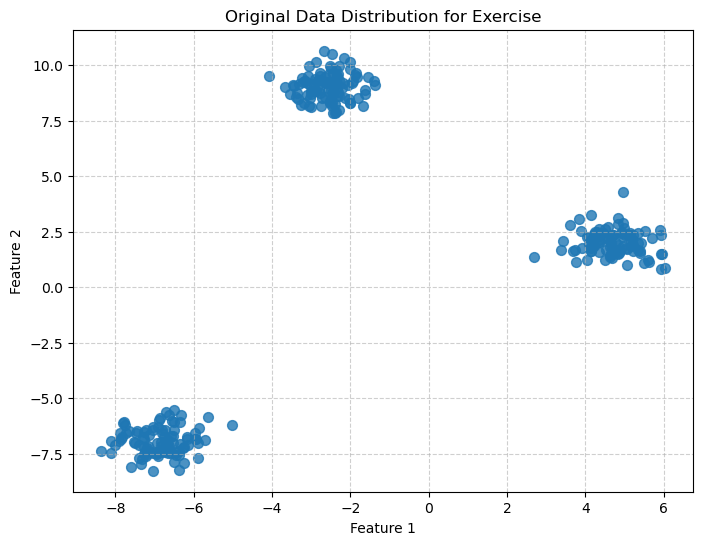


--- 訓練 SOM with 5x5 Grid ---


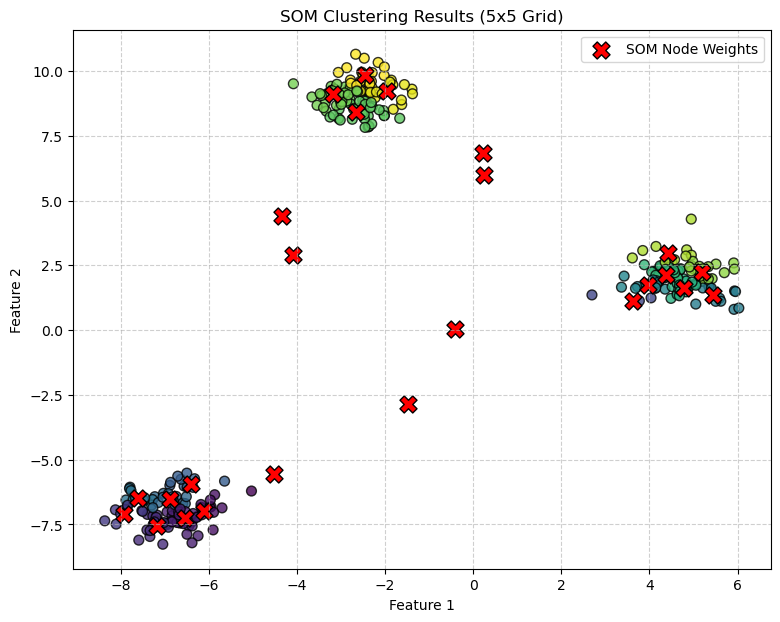


--- 訓練 SOM with 20x20 Grid ---


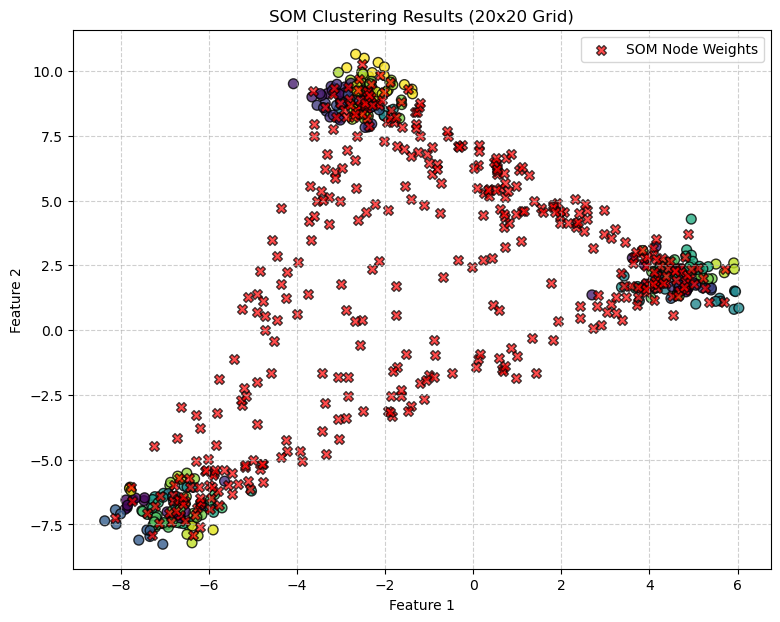

In [250]:
# 載入必要的函式庫
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from minisom import MiniSom # 導入 MiniSom 函式庫
from matplotlib.lines import Line2D # 用於自訂圖例

# --- 練習題 1 解答 ---

# 1. 生成包含 3 個群集的資料集
X_ex, y_true_ex = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# 視覺化原始資料
plt.figure(figsize=(8, 6))
plt.scatter(X_ex[:, 0], X_ex[:, 1], s=50, alpha=0.8)
plt.title('Original Data Distribution for Exercise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

input_features_ex = X_ex.shape[1]
num_iterations_ex = 1000

# --- 情況一: 較小的 SOM 網格 (5x5) ---
print("\n--- 訓練 SOM with 5x5 Grid ---")
som_small = MiniSom(x=5, y=5, input_len=input_features_ex, sigma=1.0, learning_rate=0.5, random_seed=42)
som_small.random_weights_init(X_ex)
som_small.train_random(data=X_ex, num_iteration=num_iterations_ex, verbose=False) # 關閉 verbose 避免輸出過多
weights_small = som_small.get_weights()

# 取得基於 BMU 的分群標籤
cluster_labels_small = np.zeros(X_ex.shape[0], dtype=int)
for i, data_point in enumerate(X_ex):
    winning_node = som_small.winner(data_point)
    cluster_labels_small[i] = winning_node[0] * 5 + winning_node[1] # 將 (row, col) 映射為單一 ID

# 視覺化分群結果 (5x5 網格)
plt.figure(figsize=(9, 7))
plt.scatter(X_ex[:, 0], X_ex[:, 1], c=cluster_labels_small, s=50, cmap='viridis', alpha=0.8, edgecolor='k')
# 繪製 SOM 權重
reshaped_weights_small = weights_small.reshape(-1, input_features_ex)
plt.scatter(reshaped_weights_small[:, 0], reshaped_weights_small[:, 1], s=150, marker='X', c='red', edgecolor='black', label='SOM Node Weights')
plt.title('SOM Clustering Results (5x5 Grid)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 情況二: 較大的 SOM 網格 (20x20) ---
print("\n--- 訓練 SOM with 20x20 Grid ---")
som_large = MiniSom(x=20, y=20, input_len=input_features_ex, sigma=1.0, learning_rate=0.5, random_seed=42)
som_large.random_weights_init(X_ex)
som_large.train_random(data=X_ex, num_iteration=num_iterations_ex, verbose=False)
weights_large = som_large.get_weights()

# 取得基於 BMU 的分群標籤
cluster_labels_large = np.zeros(X_ex.shape[0], dtype=int)
for i, data_point in enumerate(X_ex):
    winning_node = som_large.winner(data_point)
    cluster_labels_large[i] = winning_node[0] * 20 + winning_node[1] # 將 (row, col) 映射為單一 ID

# 視覺化分群結果 (20x20 網格)
plt.figure(figsize=(9, 7))
plt.scatter(X_ex[:, 0], X_ex[:, 1], c=cluster_labels_large, s=50, cmap='viridis', alpha=0.8, edgecolor='k')
# 繪製 SOM 權重
reshaped_weights_large = weights_large.reshape(-1, input_features_ex)
plt.scatter(reshaped_weights_large[:, 0], reshaped_weights_large[:, 1], s=50, marker='X', c='red', edgecolor='black', alpha=0.7, label='SOM Node Weights') # S更小避免重疊
plt.title('SOM Clustering Results (20x20 Grid)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


[0.04599535 0.05472307 0.06485076 0.06830088 0.0721654 ]


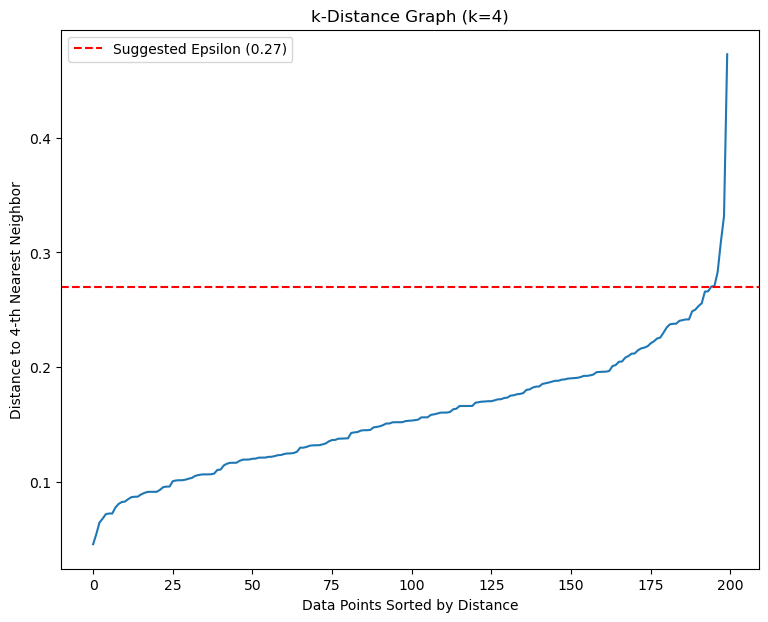

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons #導入 make_moons函式，生成半月形資料
from sklearn.preprocessing import StandardScaler #用於資料標準化，有時對DBSCAN有幫助

#資料生成
X,y_true = make_moons(n_samples=200, noise=0.08, random_state=42)
X[:10]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# plot_scatter(X[:,0], X[:,1])
# plot_scatter(X_scaled[:,0], X_scaled[:,1])


from sklearn.neighbors import NearestNeighbors #導入近鄰搜尋函式

MinPts = 4
#建立模型
neigh = NearestNeighbors(n_neighbors=MinPts, algorithm ='auto', metric='euclidean' )
#訓練模型
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled) #取得每個點到其第 MinPts 個近鄰點的距離和索引
# print(distances[0:5], indices[0:5])
sorted_distances = np.sort(distances[:,MinPts-1], axis=0)
print(sorted_distances[:5])



plt.figure(figsize=(9,7))
plt.plot(sorted_distances)



plt.title(f"k-Distance Graph (k={MinPts})")#設定圖表標題
plt.xlabel("Data Points Sorted by Distance") #設定X軸標籤
plt.ylabel(f"Distance to {MinPts}-th Nearest Neighbor") #設定Y軸標籤
#觀察圖形，找到肘部彎曲處作為 epsilon 的值
#通常在這個範例中，
plt.axhline(y=0.27, color = 'r', linestyle = "--", label = "Suggested Epsilon (0.27)")
plt.legend()
plt.show() #顯示圖表


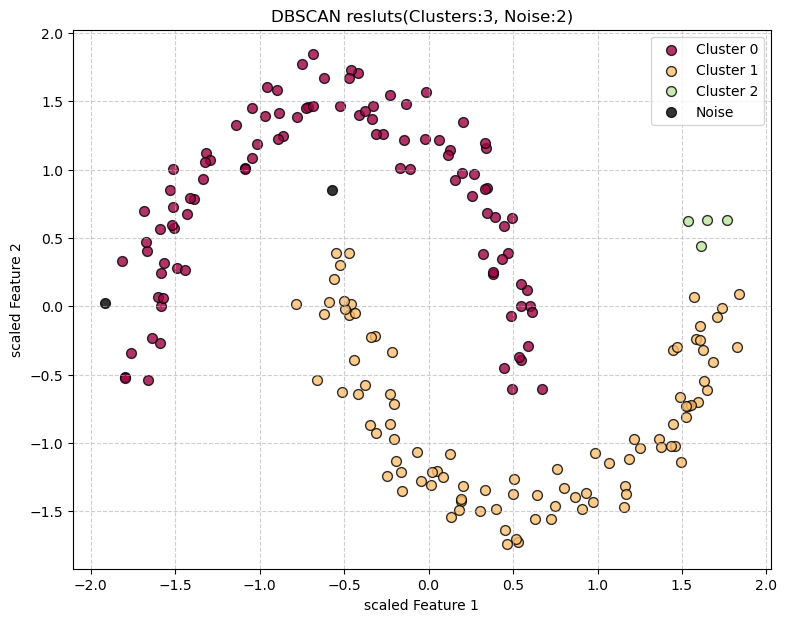

In [242]:
from sklearn.cluster import DBSCAN #導入DBSCAN類別
chosen_eps = 0.25
chosen_min_samples = 4
#建立模型
dbscan = DBSCAN(eps= chosen_eps, min_samples = chosen_min_samples, metric='euclidean')
labels = dbscan.fit_predict(X_scaled)
# labels[:20]

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
n_noise
# print(n_clusters)
# print(n_noise)
# print( list(labels).count(2))

#4.視覺劃分群結果
plt.figure(figsize=(9,7))
unique_labels = set(labels)#去重複
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))#指定不同顏色

for k, col in zip(unique_labels, colors):
    if k==-1:
        col = 'k'
        marker_style = 'o'
        label_text = 'Noise'
    else:
        marker_style = 'o'
        label_text = f'Cluster {k}'
    class_member_mask = (labels==k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=marker_style, edgecolors='k', alpha=0.8, label = label_text)
plt.title(f'DBSCAN resluts(Clusters:{n_clusters}, Noise:{n_noise})')
plt.xlabel("scaled Feature 1")
plt.ylabel("scaled Feature 2")
plt.grid(True,linestyle="--", alpha =0.6)
plt.legend()
plt.show()


練習題 1：探討 DBSCAN 參數 eps 和 min_samples 對分群結果的影響

生成一個包含 3 個群集的資料，其中兩個群集靠得相近，另一群集較為分散，並加入少量異常點（例如：使用 make_blobs，centers 設為 [[0,0], [1,1], [5,5]]，cluster_std 設不同，並使用 np.random.rand 生成一些額外的噪聲）。

第一次嘗試使用一組參數 eps=0.3, min_samples=5 進行 DBSCAN 分群。

第二次嘗試調整參數，例如 eps=0.8, min_samples=5（增大 ε）。

第三次嘗試調整參數，例如 eps=0.3, min_samples=10（增大 MinPts）。

對這三種情況，分別視覺化分群結果（標示出群集和噪聲點）。

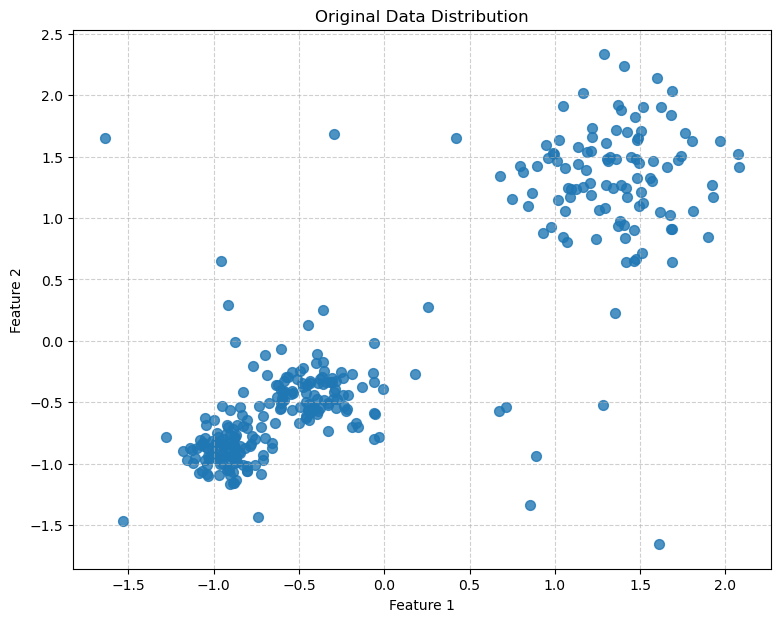

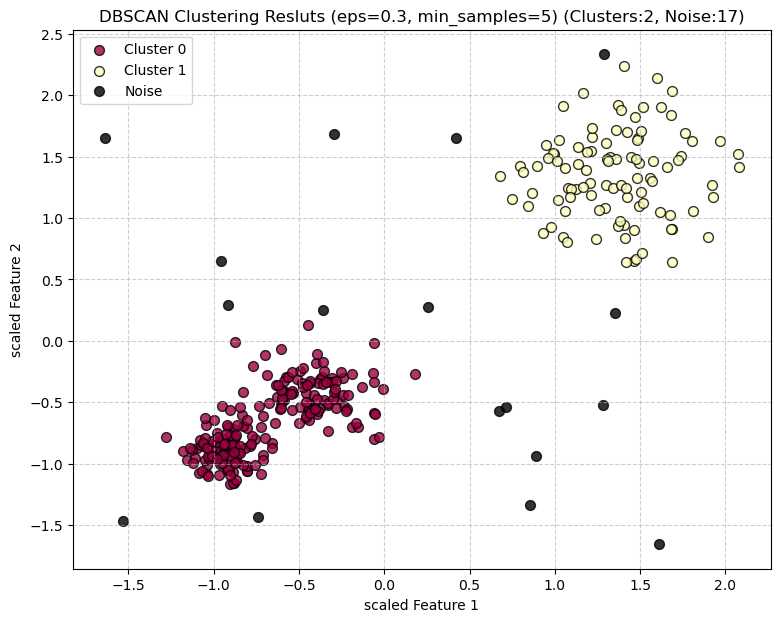

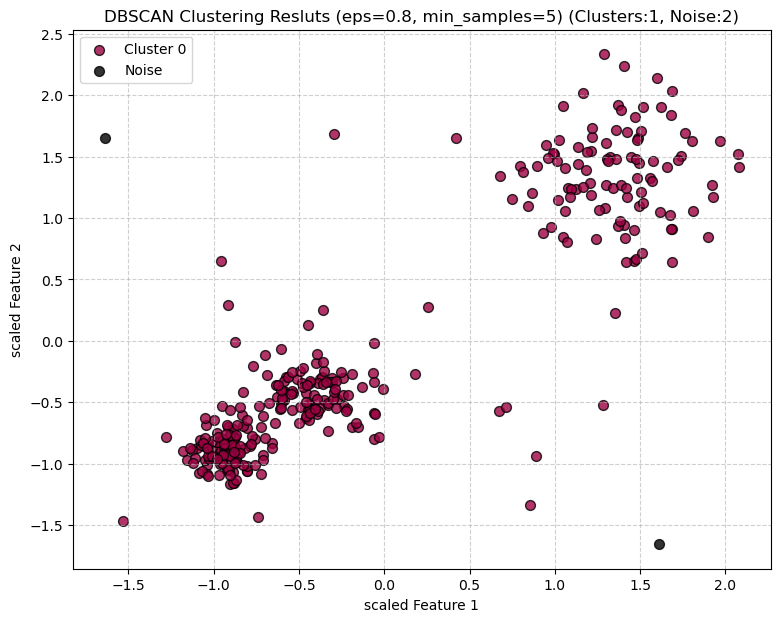

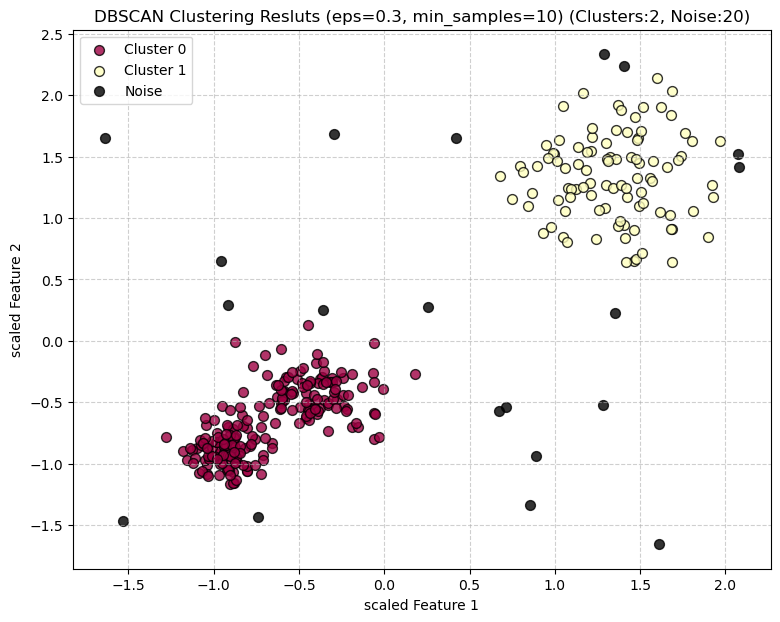

In [243]:
#產生練習題資料
X1,_ = make_blobs(n_samples=200, centers=[[0,0],[1,1]], cluster_std=[0.3,0.4], random_state=42)
X2,_ = make_blobs(n_samples=100, centers=[[5,5]], cluster_std=0.8, random_state=42)
noise_points = np.random.rand(20,2) * 8 - 2 #20點(-2到6之間)
X_ex = np.vstack([X1, X2, noise_points])#合併資料
scaler_ex = StandardScaler()
X_scaled_ex = scaler_ex.fit_transform(X_ex)
plot_scatter(X_scaled_ex[:,0], X_scaled_ex[:,1])



def plot_dbscan_resluts(data, labels, title_suffix):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    n_noise
    # print(n_clusters)
    # print(n_noise)
    # print( list(labels).count(2))

    #4.視覺劃分群結果
    plt.figure(figsize=(9,7))
    unique_labels = set(labels)#去重複
    colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))#指定不同顏色

    for k_, col in zip(unique_labels, colors):
        if k_==-1:
            col = 'k'
            marker_style = 'o'
            label_text = 'Noise'
        else:
            marker_style = 'o'
            label_text = f'Cluster {k_}'
        class_member_mask = (labels==k_)
        xy = data[class_member_mask]
        plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=marker_style, edgecolors='k', alpha=0.8, label = label_text)
    plt.title(f'DBSCAN Clustering Resluts {title_suffix} (Clusters:{n_clusters}, Noise:{n_noise})')
    plt.xlabel("scaled Feature 1")
    plt.ylabel("scaled Feature 2")
    plt.grid(True, linestyle="--", alpha =0.6)
    plt.legend()
    plt.show()



dbscan_case1 = DBSCAN(eps=0.3, min_samples=5)
labels_case1 = dbscan_case1.fit_predict(X_scaled_ex)
plot_dbscan_resluts(X_scaled_ex, labels_case1, "(eps=0.3, min_samples=5)")
dbscan_case2 = DBSCAN(eps=0.8, min_samples=5)
labels_case2 = dbscan_case2.fit_predict(X_scaled_ex)
plot_dbscan_resluts(X_scaled_ex, labels_case2, "(eps=0.8, min_samples=5)")

dbscan_case3 = DBSCAN(eps=0.3, min_samples=10)
labels_case3 = dbscan_case3.fit_predict(X_scaled_ex)
plot_dbscan_resluts(X_scaled_ex, labels_case3, "(eps=0.3, min_samples=10)")

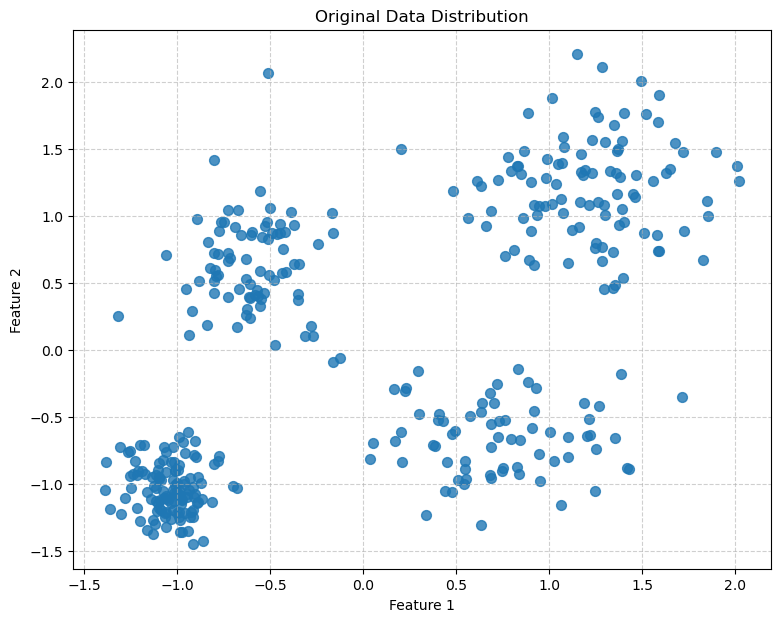

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #導入KMeans演算法
from sklearn.preprocessing import StandardScaler #用於資料標準化
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score,adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score


np.random.seed(42)
#產生資料集
# high_value_customers = np.random.normal(loc=[10000,15], scale=[1500,2], size=(100,2))
# potential_customers = np.random.normal(loc=[3000,12], scale=[800,2], size=(80,2))
# churn_risk_customers = np.random.normal(loc=[8000,5], scale=[1200,1.5], size=(70,2))
# new_low_value_customers = np.random.normal(loc=[1500,3], scale=[500,1], size=(120,2))

高消高頻 = np.random.normal(loc=[10000,15], scale=[1500,2], size=(100,2))
低消高頻 = np.random.normal(loc=[3000,12], scale=[800,2], size=(80,2))
高消低頻 = np.random.normal(loc=[8000,5], scale=[1200,1.5], size=(70,2))
低消低頻 = np.random.normal(loc=[1500,3], scale=[500,1], size=(120,2))
#合併數據
X = np.vstack([高消高頻, 低消高頻, 高消低頻, 低消低頻])
y_true = np.array([0]*100 + [1]*80 + [2]*70 + [3]*120 )
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plot_scatter(X_scaled[:,0],X_scaled[:,1])

[739.9999999999995, 346.37303225385426, 198.06570107788812, 59.65115199315388, 50.77360361100286, 44.51359130256889, 38.253335502335936, 32.088909766209646, 30.339490670001]


c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

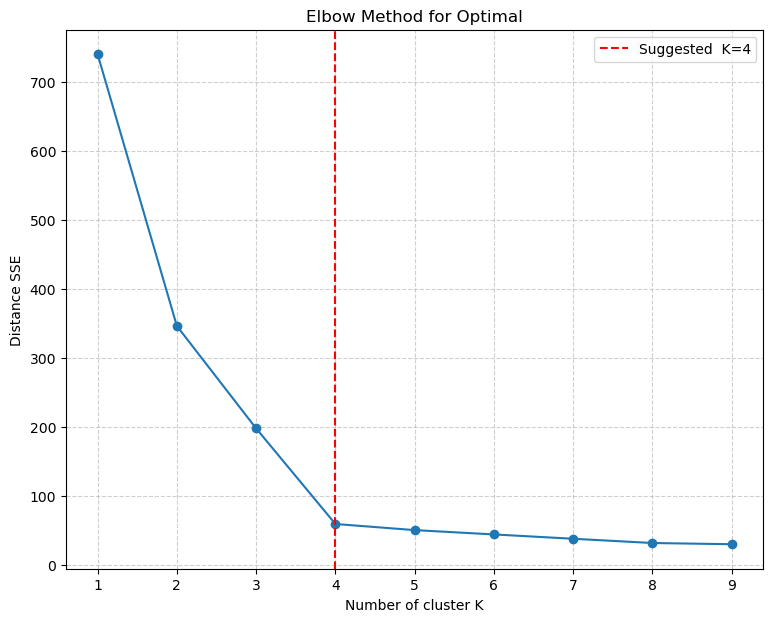

In [245]:
#K-means分群
distortions = []
K_range = range(1,10)
for k in K_range:
    kemans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kemans.fit(X_scaled)
    distortions.append(kemans.inertia_) #S.S.E
print(distortions)


plt.figure(figsize=(9,7))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal')#設定圖表標題
plt.xlabel("Number of cluster K") #設定X軸標籤
plt.ylabel(f"Distance SSE") #設定Y軸標籤
plt.grid(True,linestyle='--',alpha=0.6)
plt.axvline(x=4, color = 'r', linestyle = "--", label = "Suggested  K=4")
plt.legend()
plt.show() #顯示圖表

c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 4 5 5 4 2 5 2 4 5 4 4 5 2 4 2 2 2 2 4 5 2 5 2 5 5 2 4 5 2 2 4 5 5 4 2 5
 5 5 5 4 2 5 4 4 5 4 5 2 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


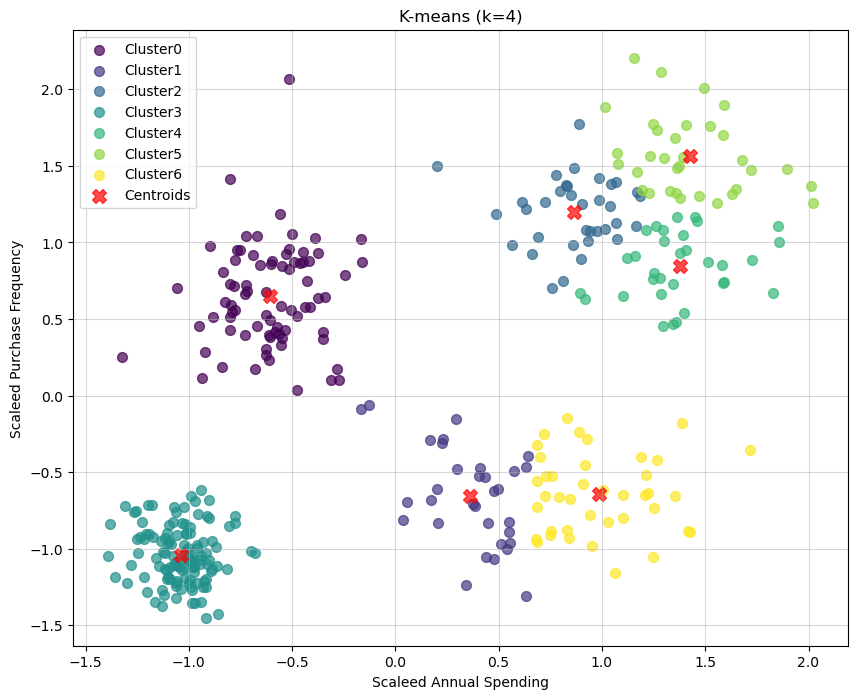

In [246]:
optimal_k = 7
kemans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kemans_model.fit_predict(X_scaled)
print(cluster_labels[50:150])
plt.figure(figsize=(10,8))
unique_labels = np.unique(cluster_labels)
cmap_continous = plt.colormaps['viridis']
colors = cmap_continous(np.linspace(0,1,len(unique_labels)))

for i , label in enumerate(unique_labels):
    members = X_scaled[cluster_labels == label]
    plt.scatter(members[:,0],members[:,1], s=50 , color = colors[i], alpha=0.7, label=f"Cluster{label}")
centroids = kemans_model.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=100 , marker='X', c='r', alpha=0.7, label="Centroids")

plt.title("K-means (k=4)")
plt.xlabel("Scaleed Annual Spending")
plt.ylabel("Scaleed Purchase Frequency")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [247]:
#評估結果
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score,adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
#################################內部評估(不需要真實標籤)#####################################
#輪廓係數
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"silhouette_score:{silhouette_avg:.3f}")
#DBI
dbi_score =davies_bouldin_score(X_scaled, cluster_labels)
print(f"davies_bouldin_score:{dbi_score:.3f}")
#CH
ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"calinski_harabasz_score:{ch_score:.3f}")
#################################外部評估(需要真實標籤)#####################################
#外部評估指標-with real labels
#ARI
ARI_score = adjusted_rand_score(y_true, cluster_labels)
print(f"ARI:{ARI_score:.3f}")
#AMI
AMI_score = adjusted_mutual_info_score(y_true, cluster_labels)
print(f"AMI:{AMI_score:.3f}")
#同質性
homogeneity_score = homogeneity_score(y_true, cluster_labels)
print(f"homogeneity_score:{homogeneity_score:.3f}")
#完整性
completeness_score = completeness_score(y_true, cluster_labels)
print(f"completeness_score:{completeness_score:.3f}")
#v_measure_score
v_measure_score = v_measure_score(y_true, cluster_labels)
print(f"v_measure_score:{v_measure_score:.3f}")

silhouette_score:0.564
davies_bouldin_score:0.788
calinski_harabasz_score:1109.855
ARI:0.802
AMI:0.848
homogeneity_score:0.985
completeness_score:0.749
v_measure_score:0.851


--- K-means 分群 ---


c:\Users\MSI-NB\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


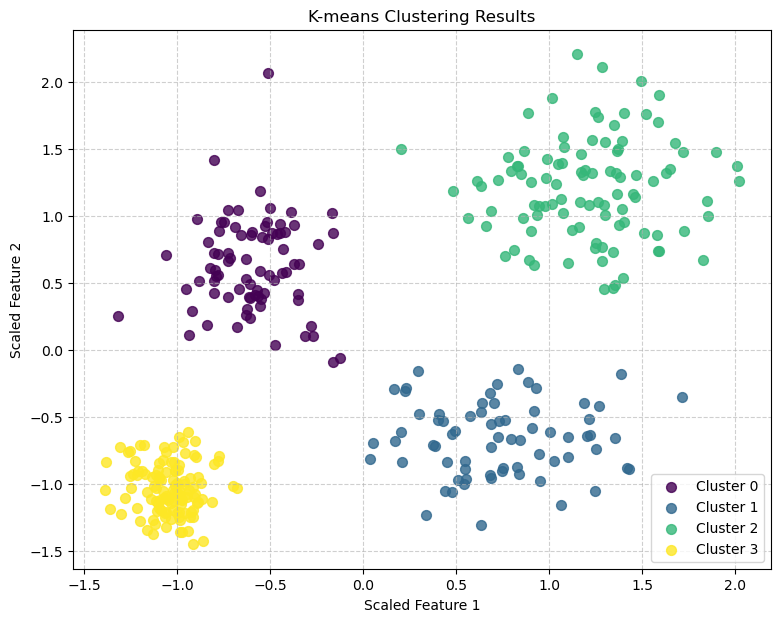

K-means 分群評估指標：
  輪廓係數 (Silhouette Score)：0.711
  Davies-Bouldin 指數：0.414
  Calinski-Harabasz 指數：1391.466
  調整後 Rand 指數 (ARI)：1.000
  V-measure：1.000

--- DBSCAN 分群 ---


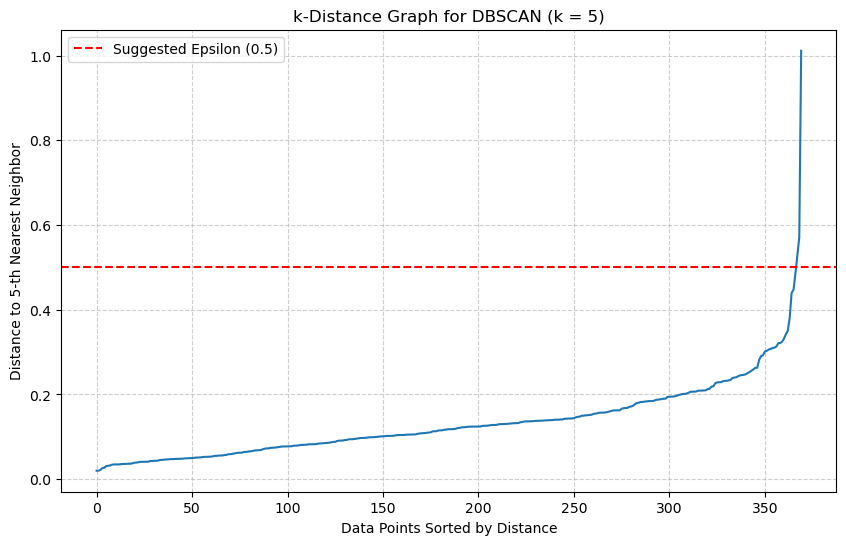

DBSCAN 預估群集數量：3，噪音點數量：1


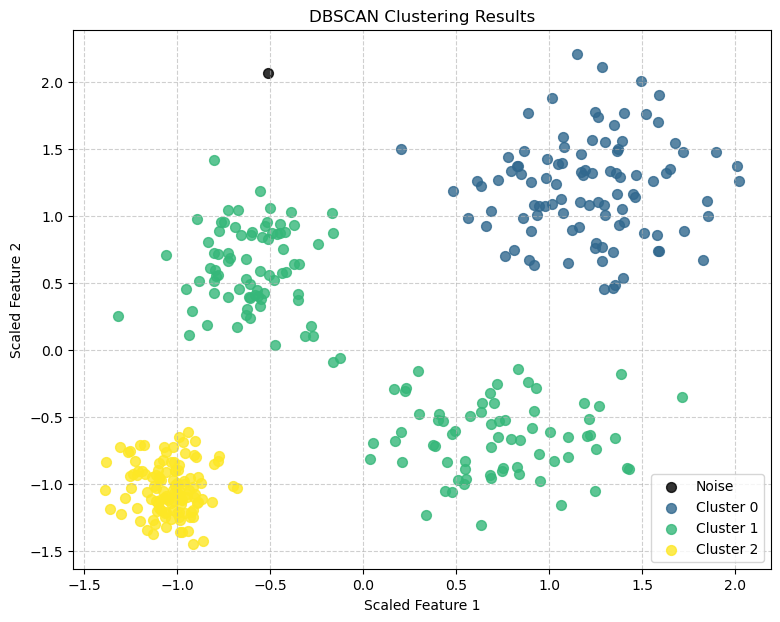

DBSCAN 分群評估指標：
  輪廓係數 (Silhouette Score)：0.517
  Davies-Bouldin 指數：0.729
  Calinski-Harabasz 指數：369.770
  調整後 Rand 指數 (ARI)：0.805
  V-measure：0.881

--- 方法比較總結 ---
K-means：適用於球形群集，對噪音不敏感，需事先指定 K 值。
DBSCAN：可發現任意形狀群集，能識別噪音點，參數選擇較敏感，對密度變化大的資料不易處理。
本例中資料為球形分佈，K-means 通常能獲得較佳的分群結果；DBSCAN 則需調整參數以避免將有效群集當成噪音。


In [248]:
# 載入必要的函式庫
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.neighbors import NearestNeighbors

# --- 練習題 1 解答 ---

# 設定隨機種子，確保結果可重現
np.random.seed(42)

# 1. 生成模擬客戶數據
high_value_customers = np.random.normal(loc=[10000, 15], scale=[1500, 2], size=(100, 2))
potential_customers = np.random.normal(loc=[3000, 12], scale=[800, 2], size=(80, 2))
churn_risk_customers = np.random.normal(loc=[8000, 5], scale=[1200, 1.5], size=(70, 2))
new_low_value_customers = np.random.normal(loc=[1500, 3], scale=[500, 1], size=(120, 2))

X_ex = np.vstack([high_value_customers, potential_customers, churn_risk_customers, new_low_value_customers])
y_true_ex = np.array([0]*100 + [1]*80 + [2]*70 + [3]*120)

# 資料標準化
scaler_ex = StandardScaler()
X_scaled_ex = scaler_ex.fit_transform(X_ex)

# 輔助繪圖函數
def plot_clustering_results(data, labels, title_prefix):
    plt.figure(figsize=(9, 7))
    unique_labels_ = np.unique(labels)
    cmap_continuous = plt.colormaps['viridis']
    colors_ = cmap_continuous(np.linspace(0, 1, len(unique_labels_)))

    for i, label_val in enumerate(unique_labels_):
        if label_val == -1:
            col_ = 'k'
            label_text_ = 'Noise'
        else:
            col_ = colors_[i]
            label_text_ = f'Cluster {label_val}'

        class_member_mask_ = (labels == label_val)
        xy_ = data[class_member_mask_]
        plt.scatter(xy_[:, 0], xy_[:, 1], s=50, c=[col_], alpha=0.8, label=label_text_)

    plt.title(f'{title_prefix} Clustering Results')
    plt.xlabel('Scaled Feature 1')
    plt.ylabel('Scaled Feature 2')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- 使用 K-means 進行分群 ---
print("--- K-means 分群 ---")
kmeans_ex = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels_kmeans = kmeans_ex.fit_predict(X_scaled_ex)

plot_clustering_results(X_scaled_ex, labels_kmeans, "K-means")

print("K-means 分群評估指標：")
print(f"  輪廓係數 (Silhouette Score)：{silhouette_score(X_scaled_ex, labels_kmeans):.3f}")
print(f"  Davies-Bouldin 指數：{davies_bouldin_score(X_scaled_ex, labels_kmeans):.3f}")
print(f"  Calinski-Harabasz 指數：{calinski_harabasz_score(X_scaled_ex, labels_kmeans):.3f}")
print(f"  調整後 Rand 指數 (ARI)：{adjusted_rand_score(y_true_ex, labels_kmeans):.3f}")
print(f"  V-measure：{v_measure_score(y_true_ex, labels_kmeans):.3f}")

# --- 使用 DBSCAN 進行分群 ---
print("\n--- DBSCAN 分群 ---")

# DBSCAN 參數選擇輔助 (K-距離圖)
MinPts_ex = 5
neigh_ex = NearestNeighbors(n_neighbors=MinPts_ex, algorithm='auto', metric='euclidean')
nbrs_ex = neigh_ex.fit(X_scaled_ex)
distances_ex, _ = nbrs_ex.kneighbors(X_scaled_ex)
sorted_distances_ex = np.sort(distances_ex[:, MinPts_ex-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(sorted_distances_ex)
plt.title(f'k-Distance Graph for DBSCAN (k = {MinPts_ex})')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'Distance to {MinPts_ex}-th Nearest Neighbor')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.5, color='r', linestyle='--', label='Suggested Epsilon (0.5)')
plt.legend()
plt.show()

# 執行 DBSCAN
chosen_eps_ex = 0.5
chosen_min_samples_ex = 5
dbscan_ex = DBSCAN(eps=chosen_eps_ex, min_samples=chosen_min_samples_ex, metric='euclidean')
labels_dbscan = dbscan_ex.fit_predict(X_scaled_ex)

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = list(labels_dbscan).count(-1)
print(f"DBSCAN 預估群集數量：{n_clusters_dbscan}，噪音點數量：{n_noise_dbscan}")

plot_clustering_results(X_scaled_ex, labels_dbscan, "DBSCAN")

if n_clusters_dbscan > 1:
    print("DBSCAN 分群評估指標：")
    print(f"  輪廓係數 (Silhouette Score)：{silhouette_score(X_scaled_ex, labels_dbscan):.3f}")
    print(f"  Davies-Bouldin 指數：{davies_bouldin_score(X_scaled_ex, labels_dbscan):.3f}")
    print(f"  Calinski-Harabasz 指數：{calinski_harabasz_score(X_scaled_ex, labels_dbscan):.3f}")
    print(f"  調整後 Rand 指數 (ARI)：{adjusted_rand_score(y_true_ex, labels_dbscan):.3f}")
    print(f"  V-measure：{v_measure_score(y_true_ex, labels_dbscan):.3f}")
else:
    print("DBSCAN 結果中群集數量過少（<=1），無法進行某些評估指標計算。")

print("\n--- 方法比較總結 ---")
print("K-means：適用於球形群集，對噪音不敏感，需事先指定 K 值。")
print("DBSCAN：可發現任意形狀群集，能識別噪音點，參數選擇較敏感，對密度變化大的資料不易處理。")
print("本例中資料為球形分佈，K-means 通常能獲得較佳的分群結果；DBSCAN 則需調整參數以避免將有效群集當成噪音。")
